## POCS  
###### Author: Zimu Huo
###### Date: 05.2022

Mainly based on Prof. John Pauly's diagram. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: G McGibney et al.
    Title: Quantitative evaluation of several partial Fourier reconstruction algorithms used in MRI
    Link: https://pubmed.ncbi.nlm.nih.gov/8371675/

    [2]
    Author: John Pauly 
    Title: Partial k-Space Recconstruction
    Link: https://ece-classes.usc.edu/ee591/library/Pauly-PartialKspace.pdf
    
   

In [1]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import util.coil as coil
from util.fft import *
import numpy as np
import util.mask as undersample
import util.simulator as simulate
from numpy import linalg
from util.zpad import *
from tqdm.notebook import tqdm
from util.partialFourier import *

In [1]:
def pocs(dataR, calib):
    idx = np.where(np.sum(np.abs(dataR), axis=1)==0)[0]
    phs = np.exp(1j*np.angle(ifft2c(calib)))
    im = np.zeros(dataR.shape, dtype = complex)
    for n in range(5):
        tmp = im*phs
        tmp = fft2c(tmp)
        tmp[:idx[0],:] = dataR[:idx[0],:] 
        tmp = ifft2c(tmp)*np.conj(phs)
        tmp[tmp < 0] = 0 
        im = tmp 
    return im

In [2]:
data = np.load("../lib/slice1_grappa1.npy")
[ny,nx,nc] = data.shape

In [3]:
dataR = data * undersample.partialFourier(data.shape, 0.7)
calib = simulate.acs(dataR,(64, 256))
calib = zpad3(calib)

In [4]:
recon = np.zeros(dataR.shape, dtype = complex)
for c in tqdm(range(nc)):
    recon[...,c] = pocs(dataR[...,c], calib[...,c])

  0%|          | 0/34 [00:00<?, ?it/s]

C:\Users\Zimu\AppData\Local\Temp\ipykernel_2112\1238187213.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(coil.rsos((dataR)))),cmap='gray')


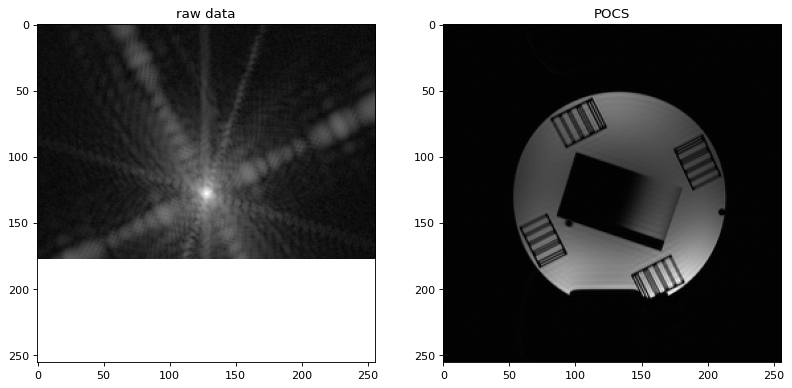

In [5]:
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(121)
plt.title("raw data")
plt.imshow(np.log(np.abs(coil.rsos((dataR)))),cmap='gray')
plt.subplot(122)
plt.title("POCS")
plt.imshow(np.abs(coil.rsos(recon.real)),cmap = 'gray')
plt.show()